## Лекція 54: Глибоке навчання. Фреймворк Pytorch.

### Домашнє завдання:

Використовуючи наведений в лекції датасет і код, створіть на основі двошарової нейромережі тришарову. Оцініть її похибку та точність визначення класів. 

Після цього використайте для оцінки похибки Mean Squared Error (синтаксис – за посиланням), в якості оптимізатора – Adam (синтаксис – за посиланням). Порівняйте, чи змінилась похибка та точність.

### Розв'язок

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torchviz

In [2]:
# Генеруємо дані для нашої моделі

X = torch.rand (1200, 2)                       
Y = (torch.sum((X - 0.5)**2, axis=1) < 0.1).float().view(-1,1)

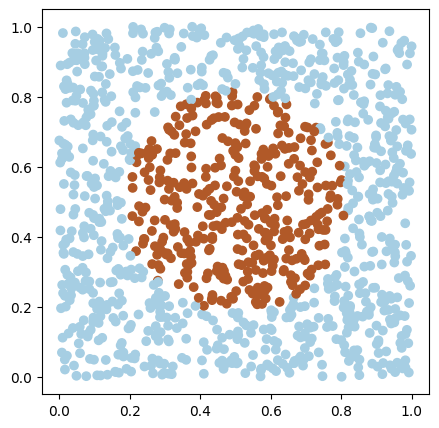

In [3]:
# Візуалізуємо дані

plt.figure (figsize=(5, 5))
plt.scatter(X.numpy()[:,0], X.numpy()[:,1], c=Y.numpy()[:,0],cmap=plt.cm.Paired)        
plt.show() 

In [4]:
# Функція для навчання моделі

def fit(model, X,Y, batch_size=100, train=True):    
      model.train(train)                                 
      sumL, sumA, numB = 0, 0, int( len(X)/batch_size ) 
       
      for i in range(0, numB*batch_size, batch_size):          
        xb = X[i: i+batch_size]                          # поточний батч
        yb = Y[i: i+batch_size]                          # тензори поточного батчу
                      
        y = model(xb)                                    # пряме розповсюдження
        L = loss(y, yb)                                  # похибка
  
        if train:                                        # в режимі навчання
            optimizer.zero_grad()                        # обнуляємо градієнти,        
            L.backward()                                 # обчислюємо градієнти,            
            optimizer.step()                             # підганяємо параметри
                                     
        sumL += L.item()                                 # сумарна похибка
        sumA += (y.round() == yb).float().mean()         # точність визначення окремого класу
         
        return sumL/numB,  sumA/numB   

### Створюємо тришарову нейромережу використовуючи параметри з лекції

In [5]:
nX, nH1, nH2, nY = 2, 5, 5, 1
model1 = nn.Sequential(
    nn.Linear(nX, nH1),
    nn.Sigmoid(),
    nn.Linear(nH1, nH2),
    nn.Sigmoid(),   
    nn.Linear(nH2, nY),
    nn.Sigmoid())

loss = nn.BCELoss() # Binary Cross Entropy
optimizer = torch.optim.SGD(model1.parameters(), lr=0.5, momentum=0.8)

Parameters for torch.optim.SGD:
    
params (iterable) – iterable of parameters to optimize or dicts defining parameter groups

lr (float) – learning rate

momentum (float, optional) – momentum factor (default: 0)

weight_decay (float, optional) – weight decay (L2 penalty) (default: 0)

dampening (float, optional) – dampening for momentum (default: 0)

nesterov (bool, optional) – enables Nesterov momentum (default: False)

maximize (bool, optional) – maximize the params based on the objective, instead of minimizing (default: False)

foreach (bool, optional) – whether foreach implementation of optimizer is used. If unspecified by the user (so foreach is None), we will try to use foreach over the for-loop implementation on CUDA, since it is usually significantly more performant. (default: None)

differentiable (bool, optional) – whether autograd should occur through the optimizer step in training. Otherwise, the step() function runs in a torch.no_grad() context. Setting to True can impair performance, so leave it False if you don’t intend to run autograd through this instance (default: False)

In [6]:
                                                         # режим оцінки моделі
print( "before:      loss: %.4f accuracy: %.4f" %  fit(model1, X,Y) )
 
epochs = 5000                                            # число епох
for epoch in range(epochs):                              # епоха: прохід
    L,A = fit(model1, X, Y)                               # по всьому датасету
     
    if epoch % 100 == 0 or epoch == epochs-1:                 
        print(f'epoch: {epoch:5d} loss: {L:.4f} accuracy: {A:.4f}' ) 

before:      loss: 0.0631 accuracy: 0.0250
epoch:     0 loss: 0.0579 accuracy: 0.0267
epoch:   100 loss: 0.0509 accuracy: 0.0583
epoch:   200 loss: 0.0509 accuracy: 0.0583
epoch:   300 loss: 0.0509 accuracy: 0.0583
epoch:   400 loss: 0.0509 accuracy: 0.0583
epoch:   500 loss: 0.0508 accuracy: 0.0583
epoch:   600 loss: 0.0507 accuracy: 0.0583
epoch:   700 loss: 0.0506 accuracy: 0.0583
epoch:   800 loss: 0.0502 accuracy: 0.0583
epoch:   900 loss: 0.0492 accuracy: 0.0583
epoch:  1000 loss: 0.0471 accuracy: 0.0583
epoch:  1100 loss: 0.0446 accuracy: 0.0583
epoch:  1200 loss: 0.0429 accuracy: 0.0583
epoch:  1300 loss: 0.0416 accuracy: 0.0583
epoch:  1400 loss: 0.0382 accuracy: 0.0633
epoch:  1500 loss: 0.0342 accuracy: 0.0642
epoch:  1600 loss: 0.0327 accuracy: 0.0625
epoch:  1700 loss: 0.0319 accuracy: 0.0625
epoch:  1800 loss: 0.0314 accuracy: 0.0625
epoch:  1900 loss: 0.0309 accuracy: 0.0625
epoch:  2000 loss: 0.0306 accuracy: 0.0625
epoch:  2100 loss: 0.0303 accuracy: 0.0617
epoch:  220

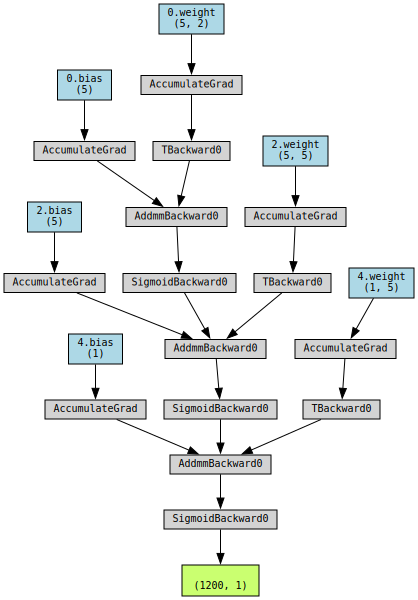

In [7]:
# Візуалізуємо нашу нейромережу

torchviz.make_dot(model1(X), params = dict(model1.named_parameters()))

### Для порівняння відтворимо нашу двошарову нейромережу з лекції

In [8]:
# Двошарова мережа з лекції

nX, nH, nY = 2, 5, 1
model = nn.Sequential(
    nn.Linear(nX, nH),
    nn.Sigmoid(),
    nn.Linear(nH, nY),
    nn.Sigmoid())

loss = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.5, momentum=0.8)

In [9]:
                                                         # режим оцінки моделі
print( "before:      loss: %.4f accuracy: %.4f" %  fit(model, X,Y) )
 
epochs = 5000                                            # число епох
for epoch in range(epochs):                              # епоха: прохід
    L,A = fit(model, X, Y)                               # по всьому датасету
     
    if epoch % 100 == 0 or epoch == epochs-1:                 
        print(f'epoch: {epoch:5d} loss: {L:.4f} accuracy: {A:.4f}' ) 

before:      loss: 0.0631 accuracy: 0.0250
epoch:     0 loss: 0.0575 accuracy: 0.0350
epoch:   100 loss: 0.0507 accuracy: 0.0583
epoch:   200 loss: 0.0503 accuracy: 0.0583
epoch:   300 loss: 0.0495 accuracy: 0.0583
epoch:   400 loss: 0.0478 accuracy: 0.0583
epoch:   500 loss: 0.0454 accuracy: 0.0583
epoch:   600 loss: 0.0409 accuracy: 0.0583
epoch:   700 loss: 0.0366 accuracy: 0.0625
epoch:   800 loss: 0.0351 accuracy: 0.0633
epoch:   900 loss: 0.0343 accuracy: 0.0633
epoch:  1000 loss: 0.0321 accuracy: 0.0642
epoch:  1100 loss: 0.0238 accuracy: 0.0708
epoch:  1200 loss: 0.0154 accuracy: 0.0792
epoch:  1300 loss: 0.0118 accuracy: 0.0817
epoch:  1400 loss: 0.0099 accuracy: 0.0817
epoch:  1500 loss: 0.0087 accuracy: 0.0817
epoch:  1600 loss: 0.0078 accuracy: 0.0817
epoch:  1700 loss: 0.0072 accuracy: 0.0825
epoch:  1800 loss: 0.0066 accuracy: 0.0825
epoch:  1900 loss: 0.0062 accuracy: 0.0825
epoch:  2000 loss: 0.0058 accuracy: 0.0825
epoch:  2100 loss: 0.0055 accuracy: 0.0825
epoch:  220

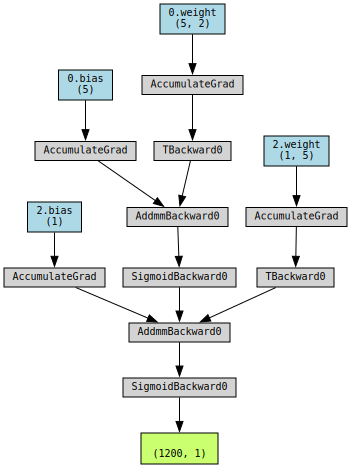

In [10]:
# Візуалізуємо нашу нейромережу

torchviz.make_dot(model(X), params = dict(model.named_parameters()))

### Створюємо тришарову нейромережу використовуючи нові параметри

In [11]:
# Створюємо тришарову мережу з новими параметрами

nX, nH1, nH2, nY = 2, 5, 5, 1
model2 = nn.Sequential(
    nn.Linear(nX, nH1),
    nn.Sigmoid(),
    nn.Linear(nH1, nH2),
    nn.Sigmoid(),   
    nn.Linear(nH2, nY),
    nn.Sigmoid())

loss = nn.MSELoss()  #оцінка втрат - Mean Squared Error
optimizer = torch.optim.Adam(model2.parameters())  #оптимізатор ADAM

Parameters for torch.optim.Adam:
    
params (iterable) – iterable of parameters to optimize or dicts defining parameter groups

lr (float, optional) – learning rate (default: 1e-3)

betas (Tuple[float, float], optional) – coefficients used for computing running averages of gradient and its square (default: (0.9, 0.999))

eps (float, optional) – term added to the denominator to improve numerical stability (default: 1e-8)

weight_decay (float, optional) – weight decay (L2 penalty) (default: 0)

amsgrad (bool, optional) – whether to use the AMSGrad variant of this algorithm from the paper On the Convergence of Adam and Beyond (default: False)

foreach (bool, optional) – whether foreach implementation of optimizer is used. If unspecified by the user (so foreach is None), we will try to use foreach over the for-loop implementation on CUDA, since it is usually significantly more performant. (default: None)

maximize (bool, optional) – maximize the params based on the objective, instead of minimizing (default: False)

capturable (bool, optional) – whether this instance is safe to capture in a CUDA graph. Passing True can impair ungraphed performance, so if you don’t intend to graph capture this instance, leave it False (default: False)

differentiable (bool, optional) – whether autograd should occur through the optimizer step in training. Otherwise, the step() function runs in a torch.no_grad() context. Setting to True can impair performance, so leave it False if you don’t intend to run autograd through this instance (default: False)

fused (bool, optional) – whether the fused implementation (CUDA only) is used. Currently, torch.float64, torch.float32, torch.float16, and torch.bfloat16 are supported. (default: None)

In [12]:
                                                         # режим оцінки моделі
print( "before:      loss: %.4f accuracy: %.4f" %  fit(model2, X,Y) )
 
epochs = 5000                                            # число епох
for epoch in range(epochs):                              # епоха: прохід
    L,A = fit(model2, X, Y)                               # по всьому датасету
     
    if epoch % 100 == 0 or epoch == epochs-1:                 
        print(f'epoch: {epoch:5d} loss: {L:.4f} accuracy: {A:.4f}' ) 

before:      loss: 0.0187 accuracy: 0.0583
epoch:     0 loss: 0.0187 accuracy: 0.0583
epoch:   100 loss: 0.0176 accuracy: 0.0583
epoch:   200 loss: 0.0175 accuracy: 0.0583
epoch:   300 loss: 0.0175 accuracy: 0.0583
epoch:   400 loss: 0.0175 accuracy: 0.0583
epoch:   500 loss: 0.0175 accuracy: 0.0583
epoch:   600 loss: 0.0175 accuracy: 0.0583
epoch:   700 loss: 0.0175 accuracy: 0.0583
epoch:   800 loss: 0.0175 accuracy: 0.0583
epoch:   900 loss: 0.0175 accuracy: 0.0583
epoch:  1000 loss: 0.0175 accuracy: 0.0583
epoch:  1100 loss: 0.0175 accuracy: 0.0583
epoch:  1200 loss: 0.0175 accuracy: 0.0583
epoch:  1300 loss: 0.0174 accuracy: 0.0583
epoch:  1400 loss: 0.0174 accuracy: 0.0583
epoch:  1500 loss: 0.0173 accuracy: 0.0583
epoch:  1600 loss: 0.0173 accuracy: 0.0583
epoch:  1700 loss: 0.0171 accuracy: 0.0583
epoch:  1800 loss: 0.0170 accuracy: 0.0583
epoch:  1900 loss: 0.0168 accuracy: 0.0583
epoch:  2000 loss: 0.0166 accuracy: 0.0583
epoch:  2100 loss: 0.0163 accuracy: 0.0583
epoch:  220

### Для порівняння відтворимо нашу двошарову нейромережу з лекції з використанням нових параметрів

In [13]:
nX, nH, nY = 2, 5, 1
model3 = nn.Sequential(
    nn.Linear(nX, nH),
    nn.Sigmoid(),
    nn.Linear(nH, nY),
    nn.Sigmoid())

loss = nn.MSELoss()  #оцінка втрат - Mean Squared Error
optimizer = torch.optim.Adam(model3.parameters())  #оптимізатор ADAM

In [14]:
                                                         # режим оцінки моделі
print( "before:      loss: %.4f accuracy: %.4f" %  fit(model3, X,Y) )
 
epochs = 5000                                            # число епох
for epoch in range(epochs):                              # епоха: прохід
    L,A = fit(model3, X, Y)                               # по всьому датасету
     
    if epoch % 100 == 0 or epoch == epochs-1:                 
        print(f'epoch: {epoch:5d} loss: {L:.4f} accuracy: {A:.4f}' ) 

before:      loss: 0.0186 accuracy: 0.0583
epoch:     0 loss: 0.0185 accuracy: 0.0583
epoch:   100 loss: 0.0176 accuracy: 0.0583
epoch:   200 loss: 0.0175 accuracy: 0.0583
epoch:   300 loss: 0.0175 accuracy: 0.0583
epoch:   400 loss: 0.0175 accuracy: 0.0583
epoch:   500 loss: 0.0175 accuracy: 0.0583
epoch:   600 loss: 0.0174 accuracy: 0.0583
epoch:   700 loss: 0.0174 accuracy: 0.0583
epoch:   800 loss: 0.0174 accuracy: 0.0583
epoch:   900 loss: 0.0174 accuracy: 0.0583
epoch:  1000 loss: 0.0174 accuracy: 0.0583
epoch:  1100 loss: 0.0174 accuracy: 0.0583
epoch:  1200 loss: 0.0173 accuracy: 0.0583
epoch:  1300 loss: 0.0173 accuracy: 0.0583
epoch:  1400 loss: 0.0173 accuracy: 0.0583
epoch:  1500 loss: 0.0173 accuracy: 0.0583
epoch:  1600 loss: 0.0172 accuracy: 0.0583
epoch:  1700 loss: 0.0172 accuracy: 0.0583
epoch:  1800 loss: 0.0172 accuracy: 0.0583
epoch:  1900 loss: 0.0171 accuracy: 0.0583
epoch:  2000 loss: 0.0171 accuracy: 0.0583
epoch:  2100 loss: 0.0170 accuracy: 0.0583
epoch:  220

### Порівняємо наші результати:

1) Тришарова нейромережа з параметрами з лекції:
    
    epoch:  4999 loss: 0.0088 accuracy: 0.0800

2) Двошарова нейромережа з параметрами з лекції:

    epoch:  4999 loss: 0.0026 accuracy: 0.08252.
   

При використанні параметрів з лекції, ми бачимо, що двошарова модель навчається краще але точність моделі майже не відрізняється. Можливо потрібно ще збільшити кількість епох для покращення показників.

3) Тришарова нейромережа з новими параметрами:
    
    epoch:  4999 loss: 0.0053 accuracy: 0.0792

4) Двошарова нейромережа з новими параметрами:

    epoch:  4999 loss: 0.0094 accuracy: 0.0750

При використанні нових параметрів, ми бачимо приблизно такі ж результати. 
Показник втрат дещо краще у тришарової нейромережі, а показник точності майже однаковий, хоча трохи менший, якщо порівнювати з попередніми результатами.